# Calculating M20

I have a function defined in photwrapper to calculate M20, but I find the values are correlated with Gini and C30 rather than inversely correlated.

Want to test my logic on a uniform vs centralized image.


In [79]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import scoreatpercentile
%matplotlib inline

In [152]:
def M20old(image,xc,yc):
    from scipy.stats import scoreatpercentile
    
    ymax,xmax = image.shape

    # create a meshgrid to represent pixels in segmentation
    X,Y = np.meshgrid(np.arange(xmax),np.arange(ymax))

    # calculate distance of each point from center of galaxy
    # this is for 2nd order moment
    distsq = (X-xc)**2 + (Y-yc)**2

    # second Moment total
    # segflag ensures that we are just counting the pixels assoc with object
    second_moment_tot = np.sum(image*distsq)

    ##
    # getting the second moment of 20% highest pixels
    ##
    
    # first get pixel value of 80th percentile,
    # so that top 20% of pixels have values higher than this
    threshold_brightest20 = scoreatpercentile(image.flatten(),80)

    # define flag for pixels that are > 80th percentile
    brightest20 = image > threshold_brightest20

    # sum the second moment of brightest 20
    second_moment_20 = np.sum(image[brightest20]*distsq[brightest20])

    # now calculate M20 as
    # M20 = log10(Sum_Mi/Mtot)
    
    M20 = np.log10(second_moment_20/second_moment_tot)
    print(f"M20={M20:.2f},threshold={threshold_brightest20:.2f}, Mi_20={second_moment_20:.2f},Mtot={second_moment_tot:.2f}")
    return M20

In [157]:
def M20(image,xc,yc):
    from scipy.stats import scoreatpercentile
    
    ymax,xmax = image.shape

    # create a meshgrid to represent pixels in segmentation
    X,Y = np.meshgrid(np.arange(xmax),np.arange(ymax))

    # calculate distance of each point from center of galaxy
    # this is for 2nd order moment
    distsq = (X-xc)**2 + (Y-yc)**2

    # second Moment total
    # segflag ensures that we are just counting the pixels assoc with object
    second_moment_tot = np.sum(image*distsq)


    ##
    # getting the second moment of 20% highest pixels
    ##

    
    # Calculate threshold pixel value
    sorted_pixelvals = np.sort(image.flatten())
    flux_fraction = np.cumsum(sorted_pixelvals) / np.sum(sorted_pixelvals)
    sorted_pixelvals_20 = sorted_pixelvals[flux_fraction >= 0.8]
    
    threshold = sorted_pixelvals_20[0]

    # define flag for pixels that are > 80th percentile
    brightest20 = image > threshold

    # sum the second moment of brightest 20
    second_moment_20 = np.sum(image[brightest20]*distsq[brightest20])

    # now calculate M20 as
    # M20 = log10(Sum_Mi/Mtot)
    
    M20 = np.log10(second_moment_20/second_moment_tot)
    print(f"M20={M20:.2f},threshold={threshold:.2f}, Mi_20={second_moment_20:.2f},Mtot={second_moment_tot:.2f}")
    return M20

In [124]:
def Gini(image):
    """simplified gini function"""
    
    Xi = image.flatten()
    Xi.sort()
    
    xave = np.mean(Xi)
    n = len(Xi)
    index = np.arange(len(Xi))
    weight = 2*index-n-1
    G = np.sum(weight*Xi)/(xave*n*(n-1))

    return G

threshold=0.74, Mi_20=111.78,Mtot=282.69
M20 = -0.403


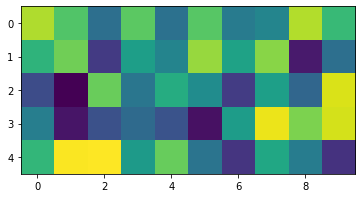

In [125]:
# make a uniform image

uimage = np.random.random((5,10))
plt.imshow(uimage)
xc = 5
yc = 2.5
print(f"M20 = {M20(uimage,xc,yc):.3f}")

M20 = -0.461


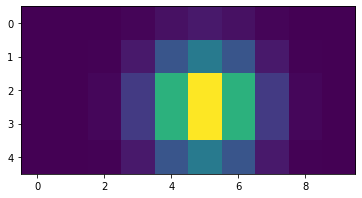

In [17]:
# make a concentrated image
xmax = 10
ymax = 5
xc = 5
yc = 2.5
X,Y = np.meshgrid(np.arange(xmax),np.arange(ymax))
sigma = 1.5
cimage = np.exp(-1*((X-xc)**2 + (Y-yc)**2)/sigma**2)
plt.figure()
plt.imshow(cimage)
print(f"M20 = {M20(cimage,xc,yc):.3f}")

M20 = -1.155


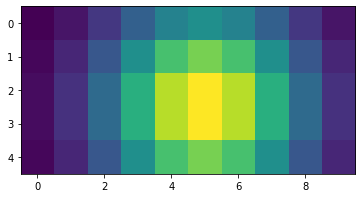

In [24]:
# make a concentrated image
xmax = 10
ymax = 5
xc = 5
yc = 2.5
X,Y = np.meshgrid(np.arange(xmax),np.arange(ymax))
sigma = 3
cimage = np.exp(-1*((X-xc)**2 + (Y-yc)**2)/sigma**2)
plt.figure()
plt.imshow(cimage)
print(f"M20 = {M20(cimage,xc,yc):.3f}")

threshold = 1.63
M20=-1.64,threshold=1.63, Mi_20=17846.90,Mtot=776203.46
M20=-1.64,threshold=1.63, Mi_20=17843.34,Mtot=776407.50
M20=-1.64,threshold=1.63, Mi_20=17832.68,Mtot=777019.61
M20=-1.64,threshold=1.63, Mi_20=17814.92,Mtot=778039.65
M20=-1.63,threshold=1.62, Mi_20=18323.34,Mtot=779467.43
M20=-1.63,threshold=1.62, Mi_20=18290.81,Mtot=781302.66
M20=-1.63,threshold=1.62, Mi_20=18251.13,Mtot=783544.98
M20=-1.64,threshold=1.61, Mi_20=18204.35,Mtot=786193.94
M20=-1.64,threshold=1.61, Mi_20=18150.52,Mtot=789249.02
M20=-1.63,threshold=1.60, Mi_20=18614.31,Mtot=792709.60
M20=-1.63,threshold=1.59, Mi_20=18564.30,Mtot=796574.98
M20=-1.64,threshold=1.58, Mi_20=18488.17,Mtot=800844.37
M20=-1.64,threshold=1.58, Mi_20=18405.13,Mtot=805516.90
M20=-1.63,threshold=1.57, Mi_20=18849.23,Mtot=810591.58
M20=-1.64,threshold=1.56, Mi_20=18750.20,Mtot=816067.36
M20=-1.63,threshold=1.55, Mi_20=19171.40,Mtot=821943.08
M20=-1.63,threshold=1.54, Mi_20=19361.45,Mtot=828217.48
M20=-1.64,threshold=1.53, Mi_20

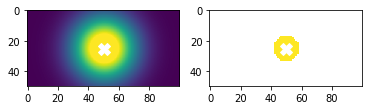

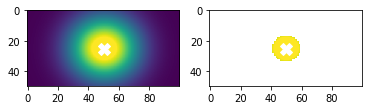

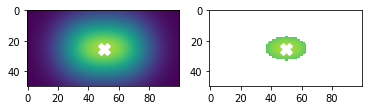

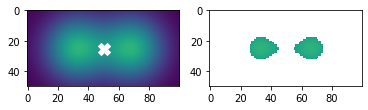

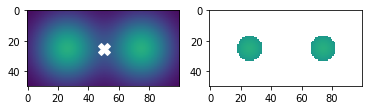

In [161]:
xmax = 100
ymax = 50
x0 = 10
yc = 25
X,Y = np.meshgrid(np.arange(xmax),np.arange(ymax))
sigma = 20
sigmas = np.linspace(0,60,100)

myM20 = []
myGini = []
for i,sep in enumerate(sigmas):
    # make a concentrated image
    x1 = xmax/2 -sep/2
    x2 = xmax/2 +sep/2
    cimage0 = np.exp(-1*((X-xmax/2)**2 + (Y-ymax/2)**2)/sigma**2)
    cimage1 = np.exp(-1*((X-x1)**2 + (Y-yc)**2)/sigma**2)
    cimage2 = np.exp(-1*((X-(x2))**2 + (Y-yc)**2)/sigma**2)
    cimage = cimage1 + cimage2 #+ cimage0
    xc = 0.5*(x1+x2)
    if i in np.arange(0,100,20):
        plt.figure()
        plt.subplot(1,2,1)
        plt.imshow(cimage,vmin=0,vmax=1.6)
        #print(np.min(cimage),np.max(cimage))
        plt.plot(xc,yc,'wX',markersize=12)
        plt.subplot(1,2,2)
        
        sorted_pixelvals = np.sort(cimage.flatten())
        flux_fraction = np.cumsum(sorted_pixelvals) / np.sum(sorted_pixelvals)
        sorted_pixelvals_20 = sorted_pixelvals[flux_fraction >= 0.8]
        threshold = sorted_pixelvals_20[0]
        #threshold = scoreatpercentile(cimage.flatten(),80)
        brightest20 = cimage > threshold
        print(f"threshold = {threshold:.2f}")
        #print(brightest20.shape,cimage.shape,threshold)
        mimage = np.ma.array(cimage,mask=~brightest20)
        plt.imshow(mimage,vmin=0,vmax=1.6)
        plt.plot(xc,yc,'wX',markersize=12)
    myM20.append(M20(cimage,xc,yc))
    myGini.append(Gini(cimage))

Text(0, 0.5, 'M20')

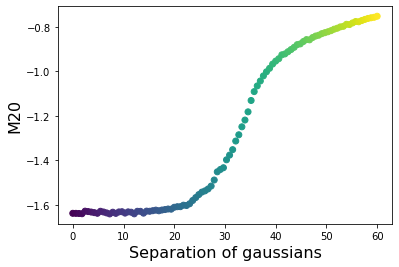

In [159]:
plt.figure()
plt.scatter(sigmas,myM20,c=sigmas)
plt.xlabel("Separation of gaussians",fontsize=16)
plt.ylabel("M20",fontsize=16)

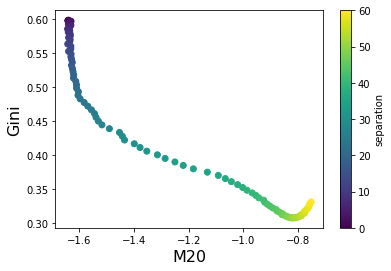

In [160]:
plt.figure()
plt.scatter(myM20,myGini,c=sigmas)
plt.xlabel("M20",fontsize=16)
plt.ylabel("Gini",fontsize=16)
plt.colorbar(label="separation")